In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import layers
from tensorflow.keras import models

In [2]:
# Define data directories
train_dir = "../data/train1"
validation_dir = "../data/validation"
test_dir = "../data/test"

# Image dimensions and other parameters
img_width, img_height = 48,48
batch_size = 64

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
# Generate batches of image data (train and validation)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 14357 images belonging to 7 classes.
Found 14352 images belonging to 7 classes.


Del notebook "SEarchCNNStructure" pudimos encontrar que la estructura de CNN óptima era la del Trial 63. A continuación se muestran los parámetros de la estructura óptima encontrada:

Trial 153 summary

Hyperparameters:

conv_filters_1: 16
conv_kernel_1: 3
num_conv_layers: 3
conv_filters_2: 128
conv_kernel_2: 5
num_dense_layers: 2
dense_units_1: 256
conv_filters_3: 128
conv_kernel_3: 3
conv_filters_4: 128
conv_kernel_4: 5
conv_filters_5: 128
conv_kernel_5: 5
conv_filters_6: 96
conv_kernel_6: 5
dense_units_2: 32
dense_units_3: 128
dense_units_4: 32
conv_filters_7: 16
conv_kernel_7: 3
Score: 0.5441053509712219

## CNN From scratch 

In [4]:
# Define the CNN model
# Vamos a tener: 4 capas convolucionales (intercaladas con capas MaxPooling) y 3 capas densas (la última con units = nºclases de los datos --> 7)

model = models.Sequential()
model.add(layers.Conv2D(16, (3,3), activation='relu', input_shape=(img_width, img_height, 3), padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(layers.Conv2D(128, (5,5), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(layers.Conv2D(128, (5,5), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

# Flatten layer
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(32, activation='relu'))

# Output layer
model.add(layers.Dense(7, activation='softmax'))  # 7 output classes (emotions)

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       51328     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

In [11]:
# Compile the model
from keras import callbacks
num_epochs = 200
earlystopping = callbacks.EarlyStopping(monitor="val_accuracy",
                                        patience=10,
                                        restore_best_weights=True)


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[earlystopping]
)

model.save('model_orig.h5')



Epoch 1/200
448/448 [==============================] - 14s 31ms/step - loss: 0.6000 - accuracy: 0.7802 - val_loss: 1.4888 - val_accuracy: 0.5557
Epoch 2/200
448/448 [==============================] - 11s 25ms/step - loss: 0.5322 - accuracy: 0.8054 - val_loss: 1.5879 - val_accuracy: 0.5501
Epoch 3/200
448/448 [==============================] - 11s 24ms/step - loss: 0.4838 - accuracy: 0.8243 - val_loss: 1.6287 - val_accuracy: 0.5505
Epoch 4/200
448/448 [==============================] - 11s 24ms/step - loss: 0.4384 - accuracy: 0.8433 - val_loss: 1.7148 - val_accuracy: 0.5498
Epoch 5/200
448/448 [==============================] - 11s 24ms/step - loss: 0.4061 - accuracy: 0.8540 - val_loss: 1.7847 - val_accuracy: 0.5470
Epoch 6/200
448/448 [==============================] - 11s 25ms/step - loss: 0.3774 - accuracy: 0.8649 - val_loss: 1.9689 - val_accuracy: 0.5480
Epoch 7/200
448/448 [==============================] - 11s 24ms/step - loss: 0.3320 - accuracy: 0.8805 - val_loss: 2.1128 - val_ac

In [12]:
df_history = pd.DataFrame(history.history)
df_history.head()

,loss,accuracy,val_loss,val_accuracy
0,0.600033,0.780241,1.488788,0.555664
1,0.532247,0.805376,1.587936,0.550084
2,0.483814,0.824332,1.628710,0.550502
3,0.438389,0.843289,1.714790,0.549805
4,0.406067,0.854006,1.784681,0.547015


<Axes: title={'center': 'Losses'}, xlabel='Epochs', ylabel='Loss'>

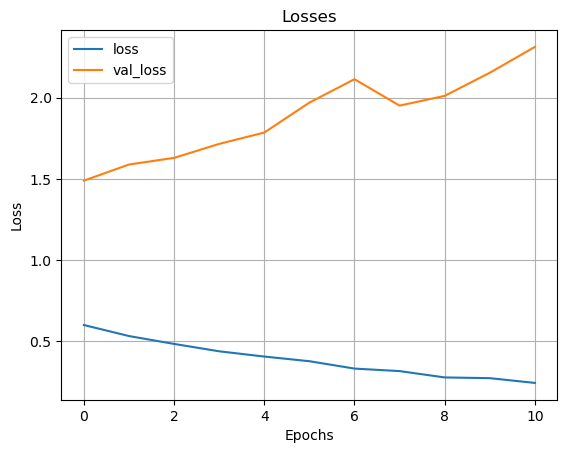

In [13]:
df_history['loss'].plot(legend=True)
df_history['val_loss'].plot(title='Losses', grid=True,
                              xlabel='Epochs',
                              ylabel='Loss',
                              legend=True)

<Axes: title={'center': 'Accuracies'}, xlabel='Epochs', ylabel='Accuracy'>

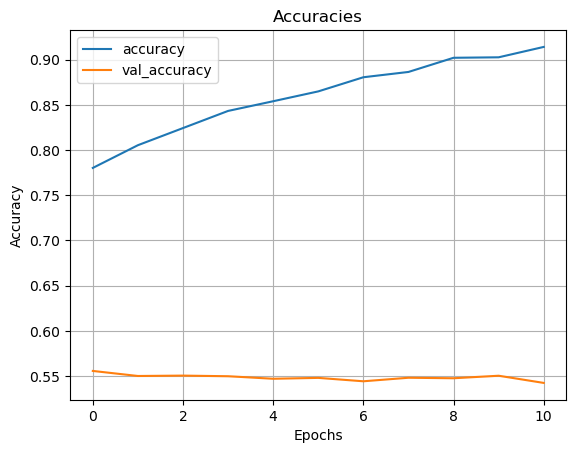

In [14]:
df_history['accuracy'].plot(legend=True)
df_history['val_accuracy'].plot(title='Accuracies', grid=True,
                              xlabel='Epochs',
                              ylabel='Accuracy',
                              legend=True)

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print("\nTest accuracy:", test_acc)